# HABERMAN DATASET

This is a dataset of breast cancer patient survival who went through surgery. This case study was conducted between 1958-1970. It has 4 attributes as follows.

Columns

1. age - Age of Patients
2. year - Year on which they were operated on
3. nodes - number of nodes found
4. Status - 1/2
           1 - survived more than 5 years
           2 - survived less than 5 years

In [70]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [71]:
data = pd.read_csv('Haberman.csv')
print(data)

     Age  Year  Nodes  Status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
..   ...   ...    ...     ...
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1
304   78    65      1       2
305   83    58      2       2

[306 rows x 4 columns]


In [72]:
print(data.shape)

(306, 4)


In [73]:
print(data.columns)

Index(['Age', 'Year', 'Nodes', 'Status'], dtype='object')


In [74]:
print(data['Status'].value_counts())

1    225
2     81
Name: Status, dtype: int64


In [75]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     306 non-null    int64
 1   Year    306 non-null    int64
 2   Nodes   306 non-null    int64
 3   Status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


Observation

1. No. of rows - 306


2. Number of columns columns - 4


3. There is no missing value in any column


4. Column Names - age, year, nodes, status


5. All columns are of integer type.


6. No. of people with status '1' - 225 (Lived more than 5 years)


7. No. of people with status '2'- 81 (Lived less than 5 years)


 The dataset is imbalanced

In [76]:
print(data.describe())

              Age        Year       Nodes      Status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


Mean


1. Average age of patients - 52 years


2. Average year of operation - 1962


3. Average no. of nodes found in patient - 4

 BIVARIATE ANALYSIS 

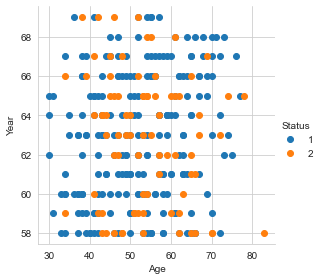

In [77]:
# Between AGE and year 
sns.set_style("whitegrid");

sns.FacetGrid(data, hue="Status", size=4).map(plt.scatter, "Age", "Year").add_legend();

plt.show();

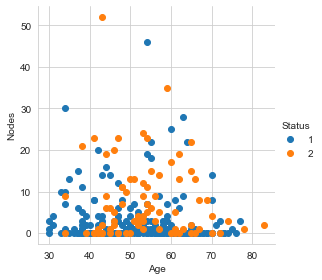

In [78]:
# AGE and NODES

sns.set_style("whitegrid");

sns.FacetGrid(data, hue="Status", size=4).map(plt.scatter, "Age", "Nodes").add_legend();

plt.show();

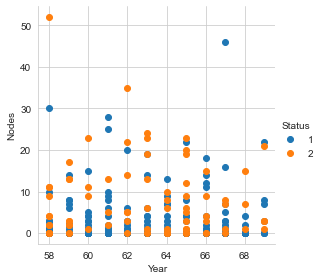

In [79]:
# YEAR and NODES

sns.set_style("whitegrid");

sns.FacetGrid(data, hue="Status", size=4).map(plt.scatter, "Year", "Nodes").add_legend();

plt.show();

Observation

1. Most of the patients have nodes number less than 5.


2. Patients with age less than 40 have higher chances of survival and comparatively have less number of nodes.


3. People with nodes more than 10 and above age 50 have less chances of survival.


4. There are more no. of patients between age 40-65.

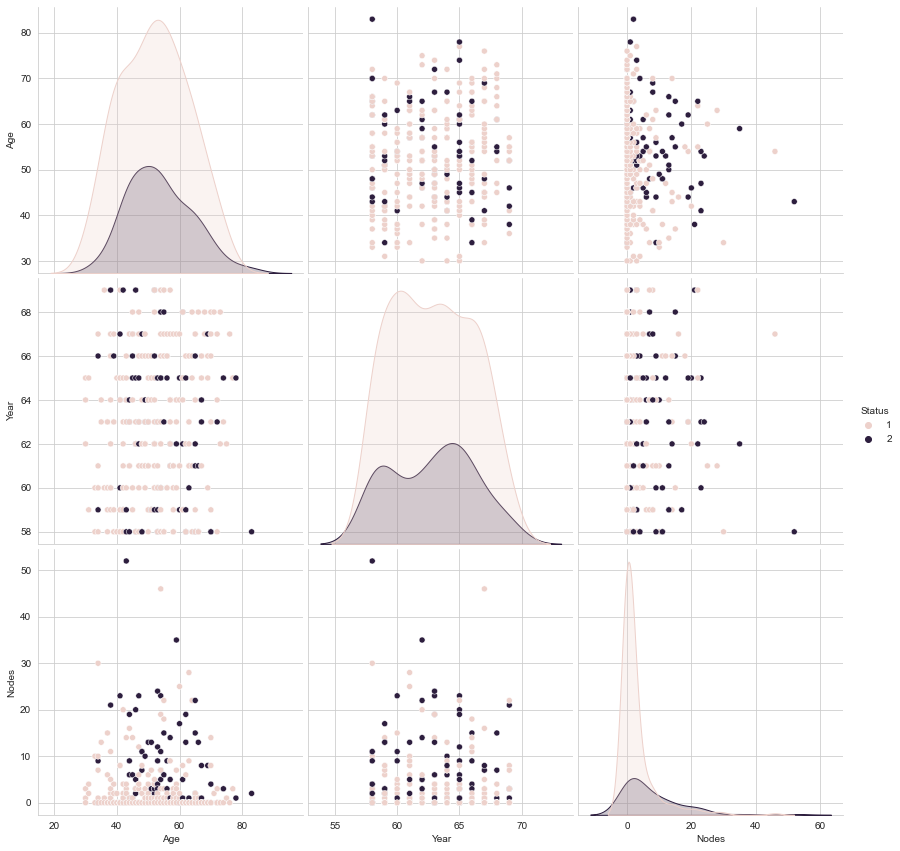

In [80]:
# Pair-plots

plt.close();

sns.set_style("whitegrid");

sns.pairplot(data, hue="Status", size=4, vars=['Age','Year','Nodes']);

plt.show()

OBSERVATION

1. There is sharp decrease in people between number of nodes from 0-4. Most people have nodes near to zero.


2. People with less number of nodes have more chance of survival and vice-versa.


3. People above 5 nodes have survived almost half as compared to deaths.


4. Survival rate is more before year 1965 and comparatively less after that.

Univariate Analysis

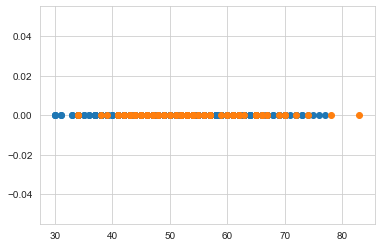

In [81]:
live_more = data.loc[data["Status"] == 1]

live_less = data.loc[data["Status"] == 2]

plt.plot(live_more["Age"], np.zeros_like(live_more['Age']), 'o')

plt.plot(live_less["Age"], np.zeros_like(live_less['Age']), 'o')

plt.show()

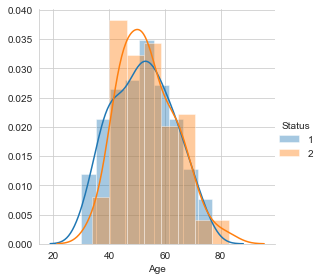

In [82]:
sns.FacetGrid(data, hue="Status", size=4).map(sns.distplot, "Age").add_legend();

plt.show();

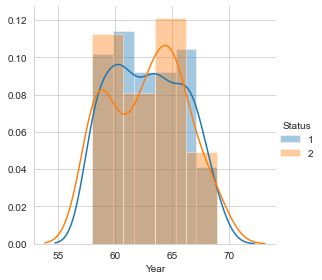

In [83]:
sns.FacetGrid(data, hue="Status", size=4).map(sns.distplot, "Year").add_legend();

plt.show();

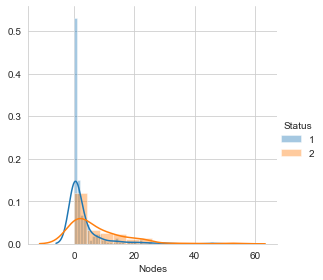

In [84]:
sns.FacetGrid(data, hue="Status", size=4).map(sns.distplot, "Nodes").add_legend();

plt.show();

Observations


1. Chances of survival decreases after 10 nodes.


2. Survival rate almost negligible after 25 nodes.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


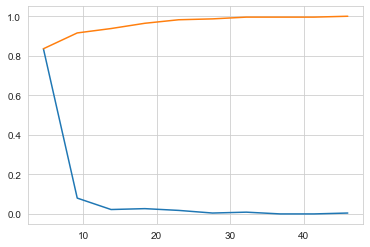

In [85]:
counts, bin_edges = np.histogram(live_more['Nodes'], bins=10, density = True)

pdf = counts/(sum(counts))

print(pdf)

print(bin_edges)

cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)

plt.plot(bin_edges[1:], cdf)

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


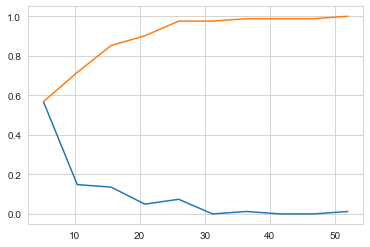

In [86]:
counts, bin_edges = np.histogram(live_less['Nodes'], bins=10, density = True)

pdf = counts/(sum(counts))

print(pdf)

print(bin_edges)

cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)

plt.plot(bin_edges[1:], cdf)

Observation

82-83% of people have nodes less than 4.6

In [87]:
print('Means : ')

print (np.mean(live_more['Nodes']))

print (np.mean(live_less['Nodes']))

print('\nVariance : ')

print (np.var(live_more['Nodes']))

print (np.var(live_less['Nodes']))

print('\nStandard Deviation : ')

print (np.std(live_more['Nodes']))

print (np.std(live_less['Nodes']))

Means : 
2.7911111111111113
7.45679012345679

Variance : 
34.30747654320981
83.3345526596555

Standard Deviation : 
5.857258449412131
9.128776076761632


In [88]:
print("Medians:")

print(np.median(live_more['Nodes']))

print(np.median(live_less['Nodes']))

print("")

print("Quantiles:")

print(np.percentile(live_more['Nodes'],np.arange(0,100,25)))

print(np.percentile(live_less['Nodes'],np.arange(0,100,25)))

print("")

print("50th percentile")

print(np.percentile(live_more['Nodes'],50))

print(np.percentile(live_less['Nodes'],50))

print("")

Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

50th percentile
0.0
4.0



Observation

1. People who survived more had 0 nodes till 75% and only 3 nodes till 100%.


2. People who survived less had 4 nodes as median

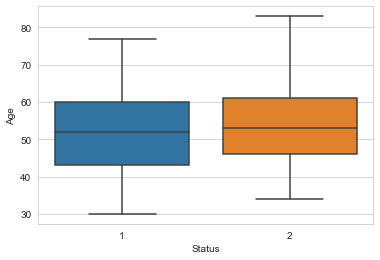

In [89]:
# Box-Plot
sns.boxplot(x='Status',y='Age', data=data)

plt.show()

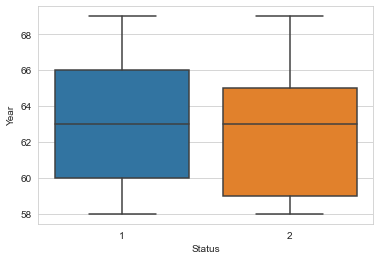

In [90]:
sns.boxplot(x='Status',y='Year', data=data)

plt.show()

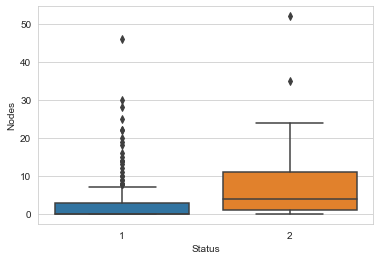

In [91]:
sns.boxplot(x='Status',y='Nodes', data=data)

plt.show()

Observation


1. There are many outliers in nodes column. 


2. There are few patients with number of nodes more than 10.


3. Less the no. of nodes, higher the survival chance.


4. After 4 number of nodes, there is less chances of survival, but still many people survived even after having higher number of nodes



MULTIVARIATE ANALYSIS

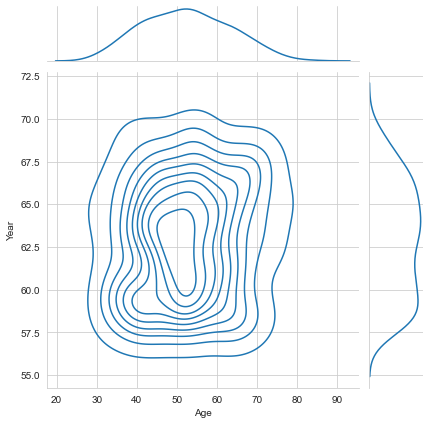

In [92]:
sns.jointplot(x="Age", y="Year", data = data, kind = "kde")

plt.show()

Observation


1. As, the graph is denser between year 1960 to 1963, more operations were done on the patients in the age group 45 to 55.


2. There were comparatively more no. of operations between year 1958-1959 for the age group 37-43

FINAL CONCLUSION


1. Most people have nodes less than 4 and there is sharp decrease in patients with higher number of nodes. Most people have nodes between 0-1.


2. Higher number of nodes indiactes less chances of survival. But there are few people who survied with higher number of nodes and also there are people who died with almost no nodes. Hence, number of nodes alone cannot be strictly deciding factor.


3. Age and Year of operation alone cannot be deciding factor. But, more number of people survived with age below 35 years.


4. People with less below 40 were seen with lesser number of nodes and more survival rate.


If you discover the nodes at early age and get operated on, more is the chances of survival.